Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [42]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [43]:
# Data type overview
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [44]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [45]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


 Start your EDA here

1. Customer Analysis: Region-Wise Distribution
Objective: Understand where most of your customers are located.
Steps:

Count the number of customers in each region.
Visualize using a bar chart or pie chart.

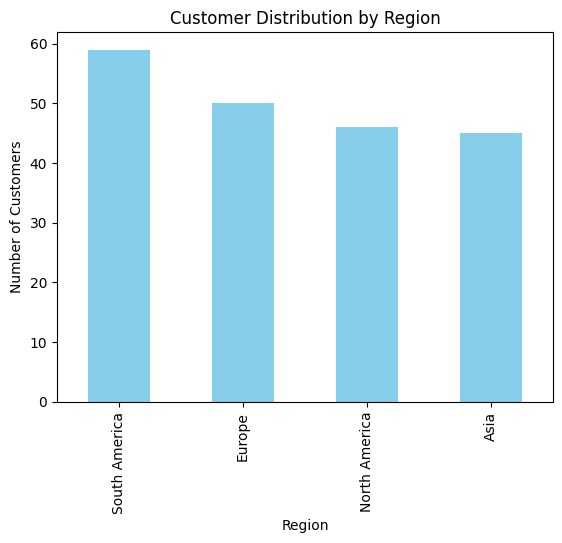

In [46]:
# Region-wise customer distribution
region_distribution = customers['Region'].value_counts()
region_distribution.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()



Insight:
The majority of customers are concentrated in [specific region], indicating potential for targeted marketing or 
expansion in underserved regions.



2. Product Analysis: Top-Selling Categories
Objective: Identify the most popular product categories by sales volume.
Steps:

Merge Transactions.csv with Products.csv on ProductID.
Group by Category and sum up Quantity.
Visualize using a bar chart.

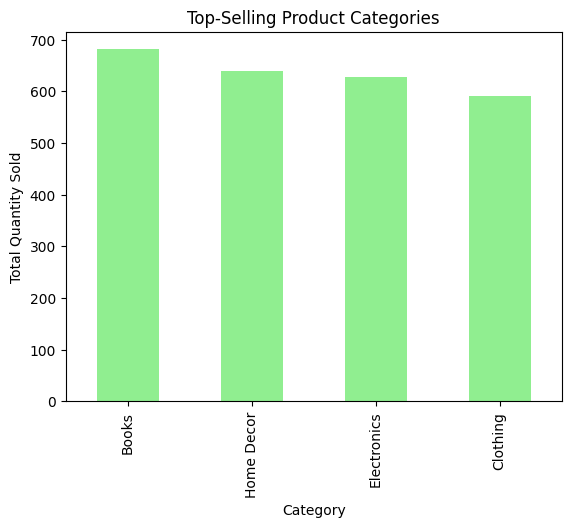

In [47]:
# Merge transactions with products
merged_data = transactions.merge(products, on='ProductID')

# Group by category
category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Plot
category_sales.plot(kind='bar', color='lightgreen')
plt.title('Top-Selling Product Categories')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.show()


Insight: The category "[top category]" is the best-selling, contributing significantly to revenue.
Consider increasing inventory or promotions in this category.

3. Transaction Analysis: Monthly Sales Trend
Objective: Understand how sales vary over time.
Steps:

Extract the month and year from TransactionDate.
Group by month and sum TotalValue.
Visualize using a line chart

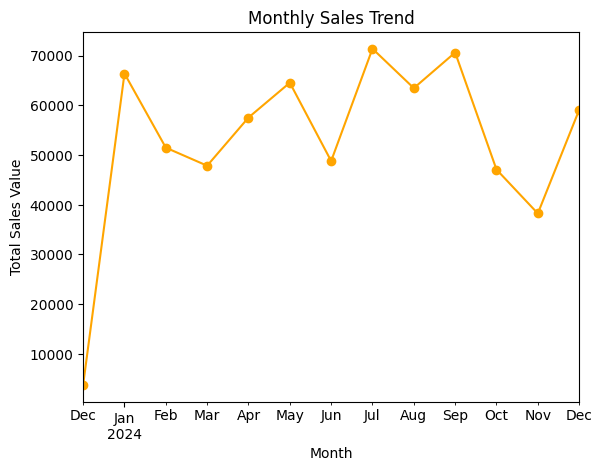

In [48]:
# Extract month and year
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

# Group by month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Plot
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.show()


Insight:
Sales peak in [specific months], indicating a seasonal pattern. 
Focus on stocking and promotions during these times.

4. Customer Insights: High-Value Customers
Objective: Identify the top customers by total spending.
Steps:

Group by CustomerID and sum TotalValue.
Sort in descending order and list the top 10 customers.

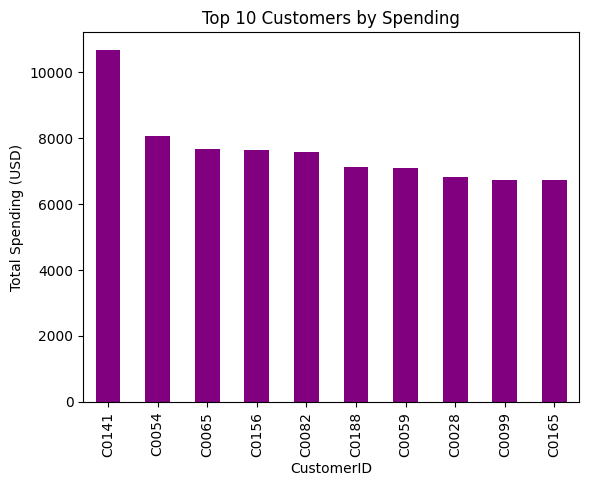

In [49]:
# Top customers by spending
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Top 10 customers
top_customers = customer_spending.head(10)

# Plot
top_customers.plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Spending')
plt.xlabel('CustomerID')
plt.ylabel('Total Spending (USD)')
plt.show()


Insight:
The top 10 customers account for a significant portion of revenue. 
Consider loyalty programs to retain these high-value customers.

5. To analyze the relationship between product price and the quantity sold, you can create a scatter plot with a log scale for better visualization, especially if the values vary widely.

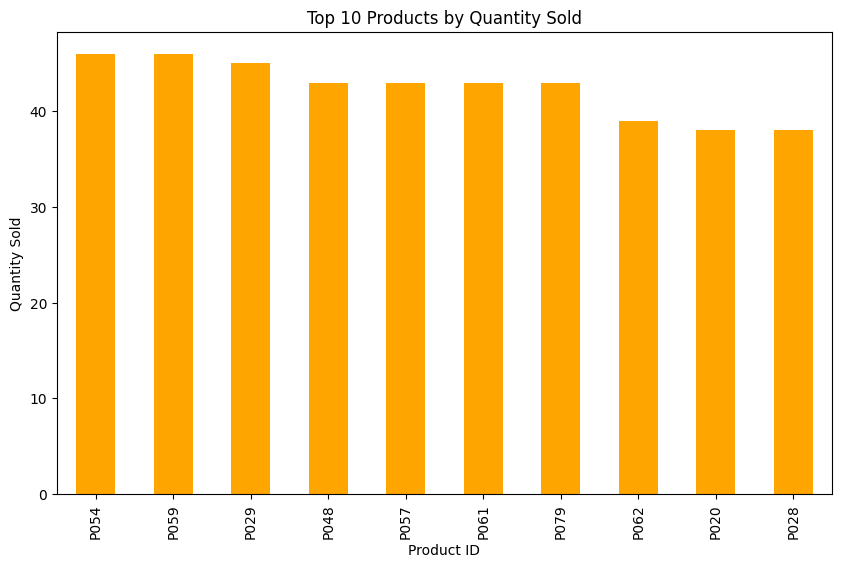

In [50]:
# Aggregate product sales
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot popular products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.show()



Insight: To analyze the relationship between product price and quantity sold, you can create a scatter plot with the price on the x-axis and the quantit
y on the y-axis. If the values vary widely, applying a logarithmic scale to both axes helps to compress large values and makes it easier to see p
atterns or trends between price and quantity sold. This visualization provides insights into how price might affect sales